# Coffee Shop Sales and Customer Behavior Analysis Report

## 1. Introduction

In this report, we analyze a coffee shop's sales data to understand the underlying patterns in sales, customer behavior, and purchasing trends. By leveraging various data analysis techniques, we aim to provide insights that can help the coffee shop enhance its sales strategies, improve customer retention, and optimize product offerings.

The data used for this analysis includes details on the date and time of each transaction, the coffee type sold, the quantity purchased, the payment mode, and the customer information. We will explore time series sales trends, customer segmentation, coffee popularity, payment preferences, and more.


In [165]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [166]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [167]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [168]:
data = pd.read_csv('coffee_sales.csv')

In [169]:
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [171]:
print("Before cleaning dataset shape:", data.shape)
print("\nBefore cleaning dataset size:", data.size)

Before cleaning dataset shape: (1133, 6)

Before cleaning dataset size: 6798


In [172]:
# Convert date and datetime columns to datetime type
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])
# data.set_index('datetime', inplace=True)

In [173]:
 # Check for missing values
print("\nMissing values before cleaning:")
print(data.isnull().sum())


Missing values before cleaning:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [174]:
# Handle missing values
data['card'] = data['card'].fillna('Cash')  # Fill missing card values with 'Cash'
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64


In [175]:
# Check for and remove duplicates
data = data.drop_duplicates()
print("\nDuplicate rows removed:")
print(data[data.duplicated()])


Duplicate rows removed:
Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name]
Index: []


In [176]:
# checking for unique names under coffee_name column and print it

unique_coffee_names = data['coffee_name'].unique()
print(unique_coffee_names)


['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


In [177]:
# Validate data types and ranges
assert data['money'].dtype == float, "Money column should be float type"
assert data['money'].min() >= 0, "Money values should be non-negative"
assert data['coffee_name'].isin(['Latte', 'Espresso', 'Cappuccino', 'Americano', 'Americano with Milk', 'Cortado', 'Hot Chocolate', 'Cocoa']).all(), "Invalid coffee names found"

# Summary statistics after cleaning
print("\nSummary statistics:")
print(data.describe())

print("\nCleaned dataset shape:", data.shape)
print("Cleaned dataset size:", data.size)


Summary statistics:
                                date                       datetime  \
count                           1133                           1133   
mean   2024-05-19 11:36:29.232127232  2024-05-20 02:38:39.053382912   
min              2024-03-01 00:00:00     2024-03-01 10:15:50.520000   
25%              2024-04-14 00:00:00  2024-04-14 10:55:27.406000128   
50%              2024-05-23 00:00:00  2024-05-23 12:22:06.604999936   
75%              2024-06-22 00:00:00  2024-06-22 08:39:50.272999936   
max              2024-07-31 00:00:00     2024-07-31 21:55:16.570000   
std                              NaN                            NaN   

             money  
count  1133.000000  
mean     33.105808  
min      18.120000  
25%      28.900000  
50%      32.820000  
75%      37.720000  
max      40.000000  
std       5.035366  

Cleaned dataset shape: (1133, 6)
Cleaned dataset size: 6798


In [178]:
# data["datetime"] = pd.to_datetime(data["datetime"])
# data["time"] = data["datetime"].dt.time
# data["date"] = pd.to_datetime(data["date"])
data["month"] = data["date"].dt.to_period("M")
# data["week"] = data["date"].dt.to_period("W")

## 2. Time Series Exploratory Data Analysis (EDA)

The first step involves conducting an Exploratory Data Analysis (EDA) to understand the sales data's temporal patterns. This involves analyzing sales at different granularities: hourly, daily, weekly, and monthly. We focus on:

### 2.1. Overall Sales Trends by Time Intervals

- **Hourly Sales Trends**: Sales data is aggregated on an hourly basis to determine peak sales hours.

- **Daily Sales Trends**: Analyze how sales fluctuate on different days to find which days drive the most revenue.

- **Weekly Sales Trends**: Discover weekly trends to identify sales patterns over a longer period.

- **Monthly Sales Trends**: Monthly aggregation helps in identifying seasonal patterns and long-term trends.


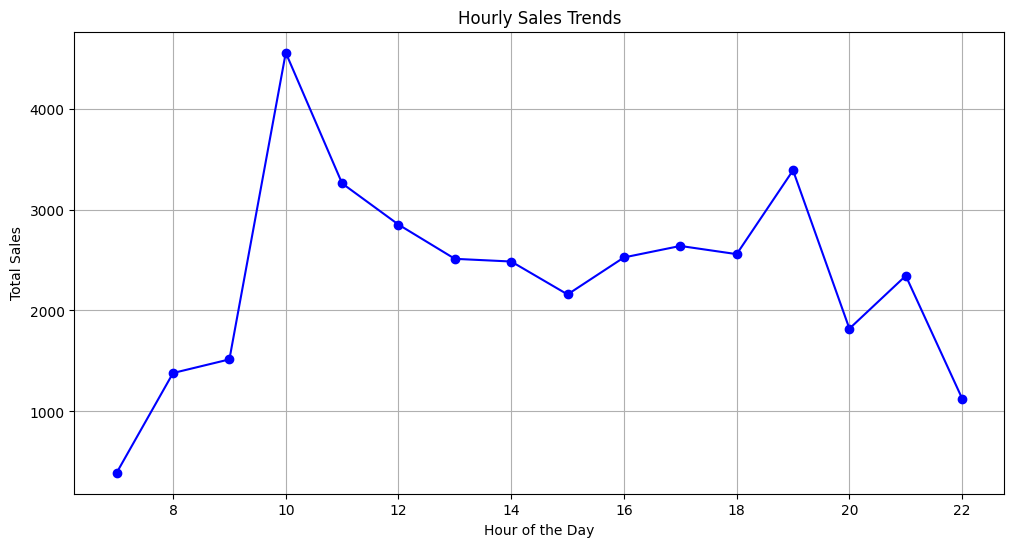

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert datetime column to datetime index
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Hourly Sales Trends
hourly_sales = data.groupby(data.index.hour)['money'].sum()

# Plot Hourly Sales Trends
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Hourly Sales Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

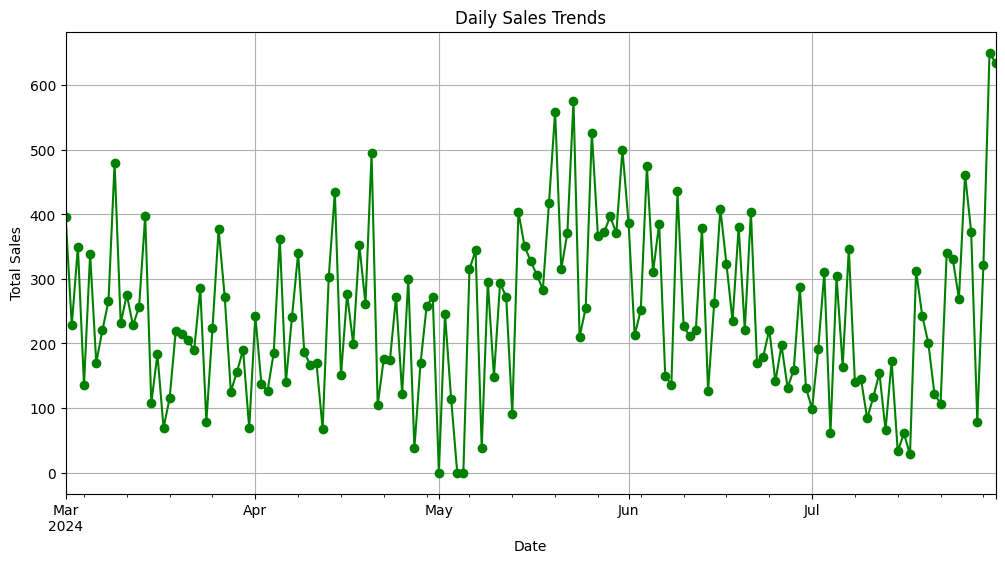

In [180]:
# Daily Sales Trends
daily_sales = data.resample('D')['money'].sum()

# Plot Daily Sales Trends
plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line', marker='o', color='green')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

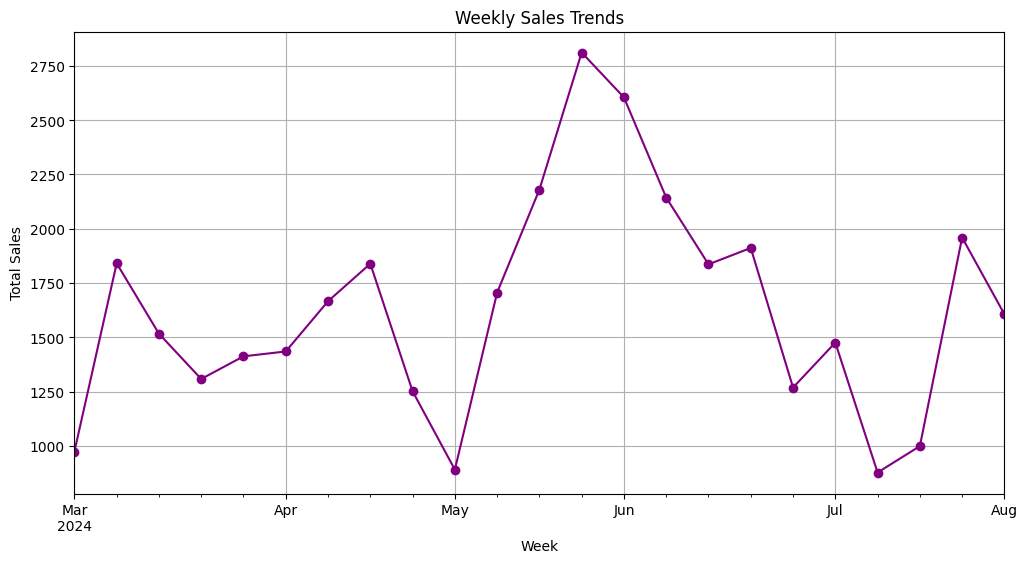

In [181]:
# Weekly Sales Trends
weekly_sales = data.resample('W')['money'].sum()

# Plot Weekly Sales Trends
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

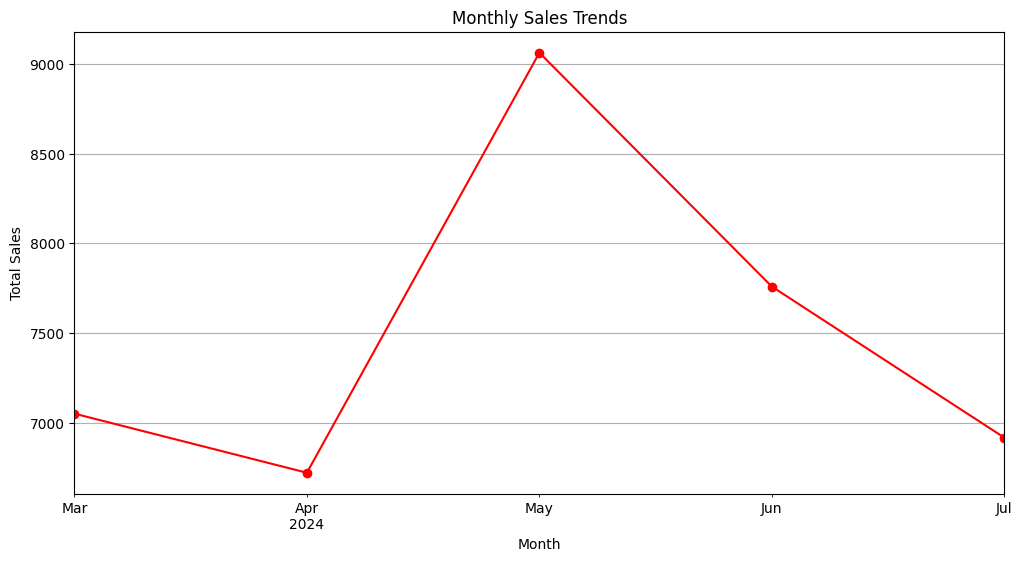

In [182]:
# Monthly Sales Trends
monthly_sales = data.resample('M')['money'].sum()

# Plot Monthly Sales Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='red')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

### **2.2. Sales by Different Times of Day**

We segment the day into Morning, Afternoon, Evening, and Night to understand customer behavior and preferences during these time slots.

**Key Observations:**

- **Morning** and **Evening** tend to have higher sales volumes, coinciding with peak coffee-drinking hours.


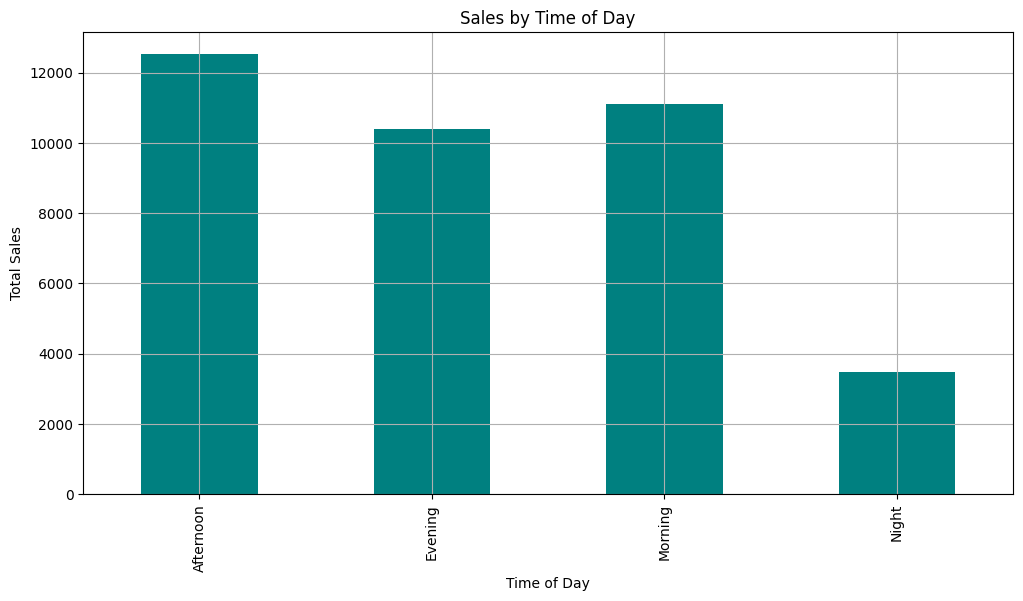

In [183]:
# Define time periods for analysis
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply function to determine time of day
data['time_of_day'] = data.index.hour.map(get_time_of_day)

# Analyze purchase patterns by time of day
purchase_patterns = data.groupby(['time_of_day'])['money'].sum()

# Visualize purchase patterns by time of day
plt.figure(figsize=(12, 6))
purchase_patterns.plot(kind='bar', color='teal')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

### **2.3. Sales Heatmap Analysis**

A heatmap visualization of daily sales & hourly sales by coffee type helps uncover underlying patterns and trends over time. This helps identify which coffee types perform well on specific days and dates.

**Key Insights:**

- The heatmap provides a visual representation of sales intensity, allowing us to spot trends and patterns in coffee sales throughout the week.
- It highlights which coffee types have higher sales on particular days, assisting in optimizing inventory and marketing strategies.


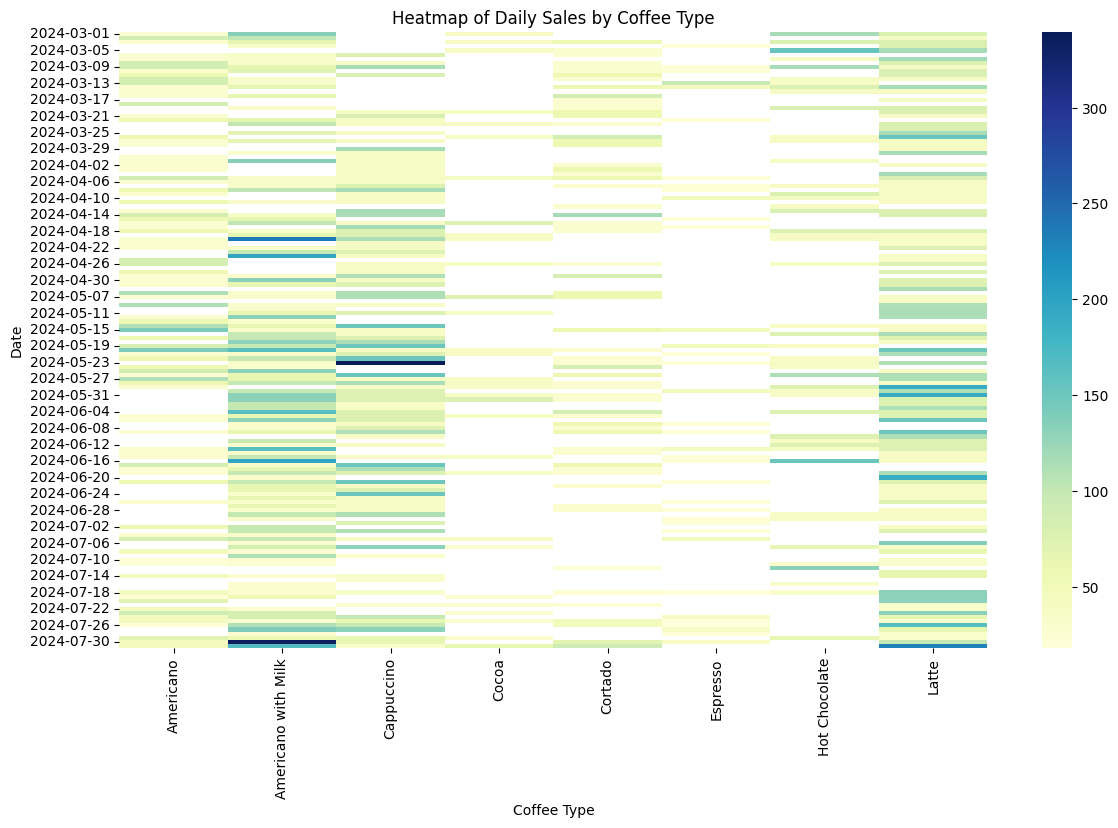

In [184]:
import seaborn as sns

# Prepare data for the heatmap
daily_coffee_sales = data.pivot_table(values='money', index=data.index.date, columns='coffee_name', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(daily_coffee_sales, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Daily Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Date')
plt.show()

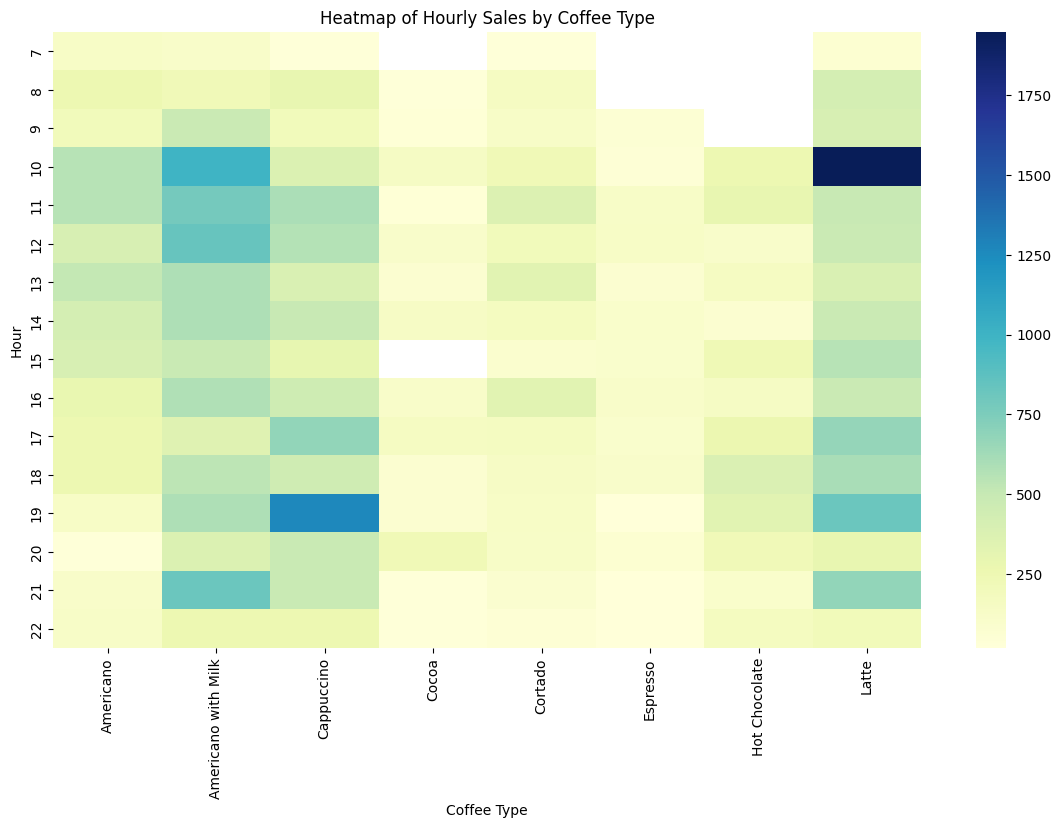

In [185]:
import seaborn as sns

# Prepare data for the heatmap
daily_coffee_sales = data.pivot_table(values='money', index=data.index.hour, columns='coffee_name', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(daily_coffee_sales, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Hourly Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Hour')
plt.show()

In [186]:
overall_sales = data.groupby(['coffee_name'])['money'].sum().reset_index()
overall_sales

,coffee_name,money
0,Americano,4644.54
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
3,Cocoa,1295.94
4,Cortado,2745.08
5,Espresso,1100.62
6,Hot Chocolate,2778.48
7,Latte,9009.14


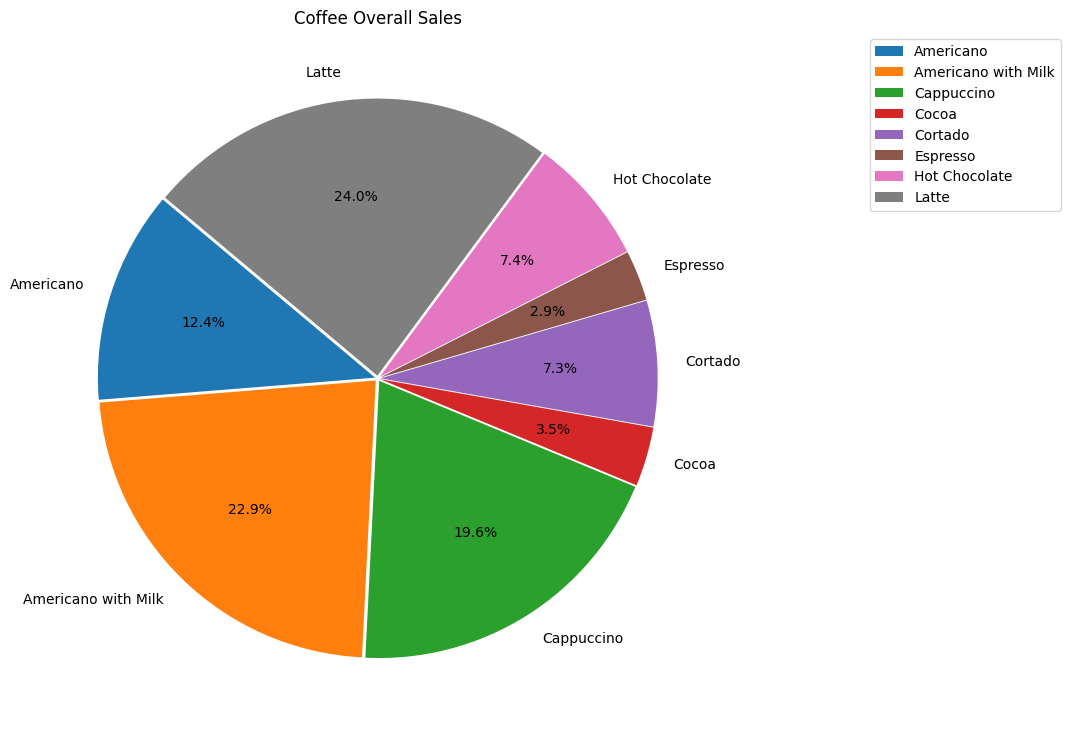

In [260]:
import matplotlib.pyplot as plt

# Plotting the pie chart for overall coffee sales
plt.figure(figsize=(9, 9))
plt.pie(
    overall_sales['money'],
    labels=overall_sales['coffee_name'],
    autopct='%1.1f%%',
    startangle=140,  # Start angle to rotate the chart
    pctdistance=0.65,  # Reduce distance of percentage labels from center
    labeldistance=1.1,  # Reduce distance of labels from center
    explode=[0.01] * len(overall_sales),  # Slightly explode slices (optional)
)

# Title and removing the y-axis label
plt.title('Coffee Overall Sales')
plt.ylabel('')

# Adjust legend position
plt.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

plt.show()


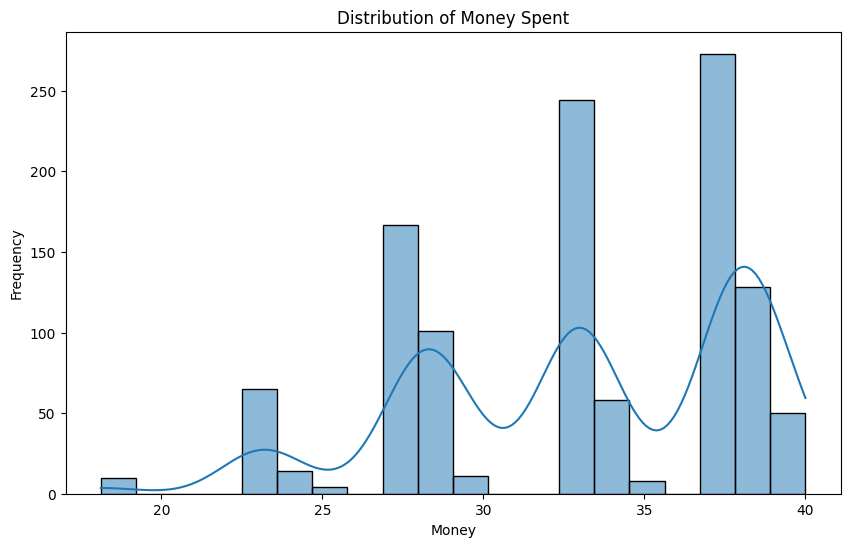

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of money spent
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], bins=20, kde=True)
plt.title('Distribution of Money Spent')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()

In [272]:
# # Monthly Transactions Trends
# monthly_transactions = data.resample('M').size()  # Count the number of transactions per month
# # Plot Monthly Transactions Trends
# plt.figure(figsize=(10, 6))
# monthly_transactions.plot(kind='bar', color='skyblue')
# plt.title('Monthly Transactions Trends')
# plt.xlabel('Month')
# plt.ylabel('Number of Transactions')

# plt.grid(axis='y')  # Grid only on y-axis for better readability
# plt.show()

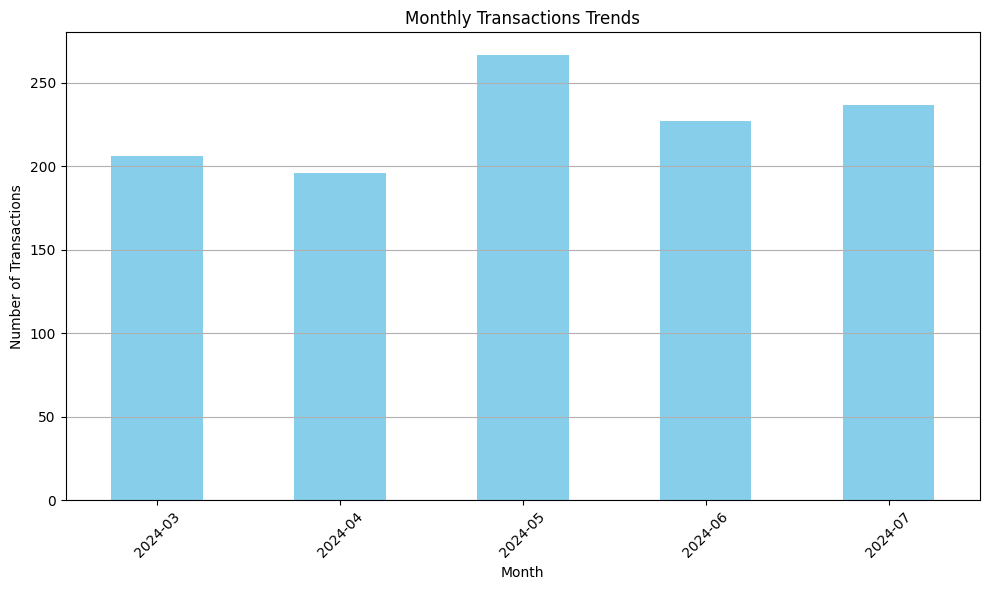

In [271]:
import matplotlib.pyplot as plt

# Count the number of transactions per month
monthly_transactions = data.resample('M').size()  # Count the number of transactions per month

# Plot Monthly Transactions Trends
plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='bar', color='skyblue')

# Title and labels
plt.title('Monthly Transactions Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Manually set x-axis labels
plt.xticks(ticks=range(len(monthly_transactions)),
           labels=[date.strftime('%Y-%m') for date in monthly_transactions.index],
           rotation=45)

# Add grid only on y-axis for better readability
plt.grid(axis='y')

plt.tight_layout()  # Adjust layout to ensure labels fit properly
plt.show()


## **3. Popular Coffee Types and Revenue Analysis**

In this section, we analyze which coffee types are more popular among customers and how much revenue they generate. This involves:

### **Identifying Most Popular Coffee Types**
- **Analyzing the total number of cups sold for each coffee type.**

### **Revenue Analysis by Coffee Types**
- **Calculating the total revenue generated by each coffee type.**

### **Sales Trends of Coffee Types Over Time**
- **Visualizing sales trends for each coffee type across different time intervals (hourly, daily, weekly, and monthly).**

### **Key Insights:**
- **Certain coffee types like Latte and Cappuccino are consistently popular across different times of the day and weeks.**
- **Seasonal trends reveal preferences for certain types of coffee during colder months.**


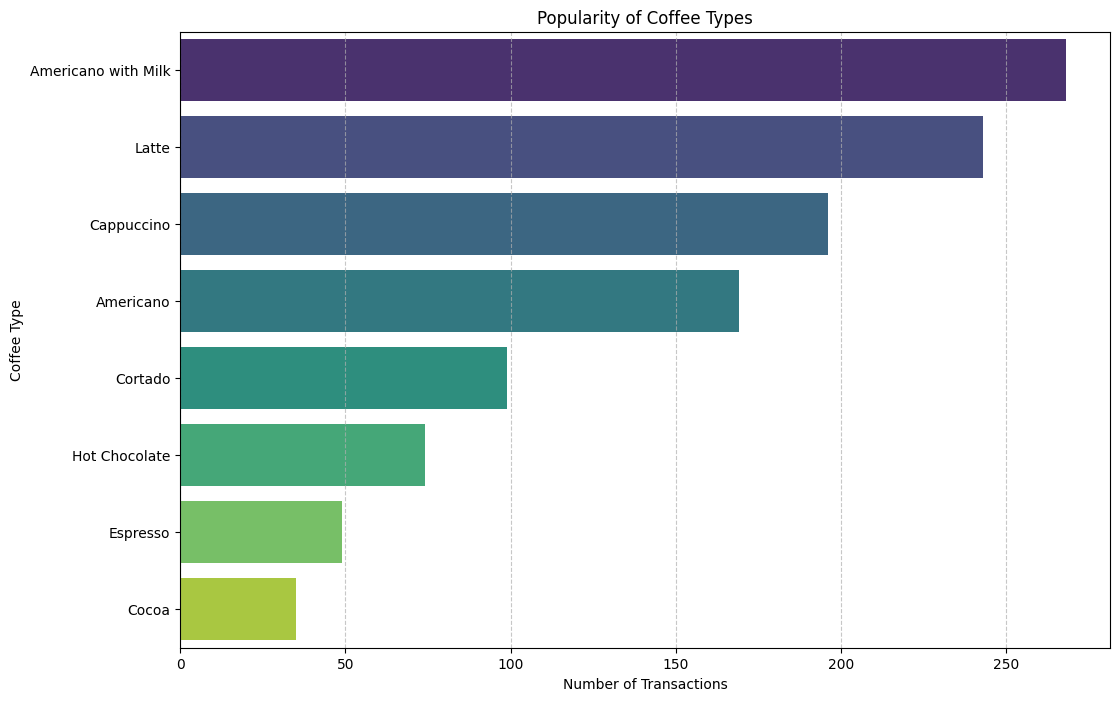

In [190]:
# Plotting the popularity of coffee types
plt.figure(figsize=(12, 8))  # Increased height for better readability
sns.countplot(y='coffee_name', data=data, order=data['coffee_name'].value_counts().index, palette='viridis')
plt.title('Popularity of Coffee Types')
plt.xlabel('Number of Transactions')
plt.ylabel('Coffee Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.show()


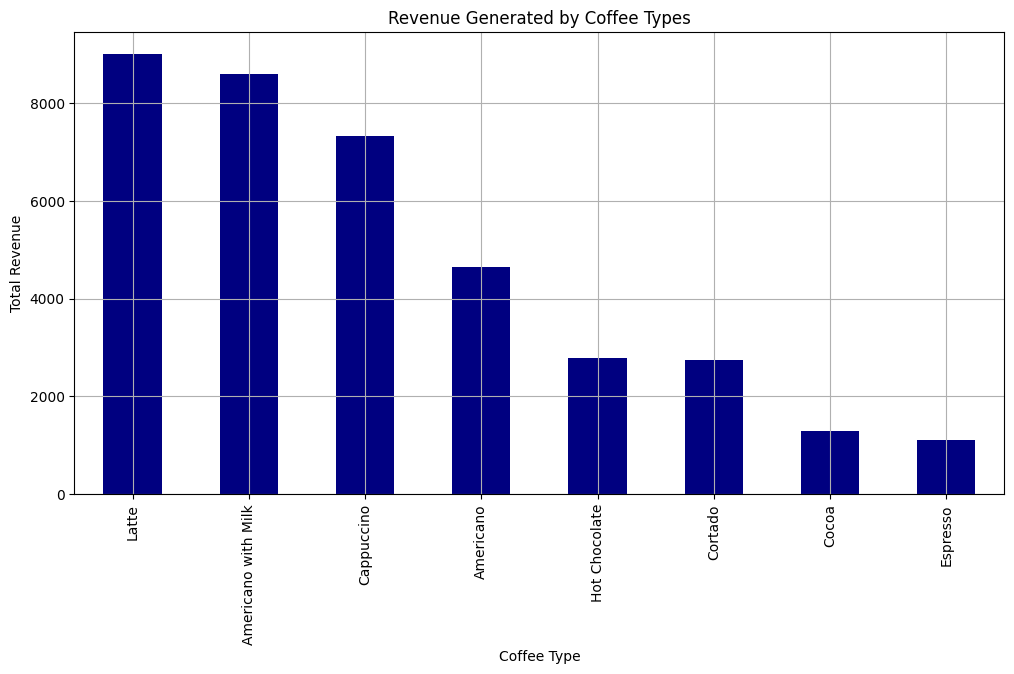

In [191]:
# Revenue Analysis by Coffee Type
coffee_revenue = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

# Plotting Revenue by Coffee Type
plt.figure(figsize=(12, 6))
coffee_revenue.plot(kind='bar', color='navy')
plt.title('Revenue Generated by Coffee Types')
plt.xlabel('Coffee Type')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()


<Figure size 1400x800 with 0 Axes>

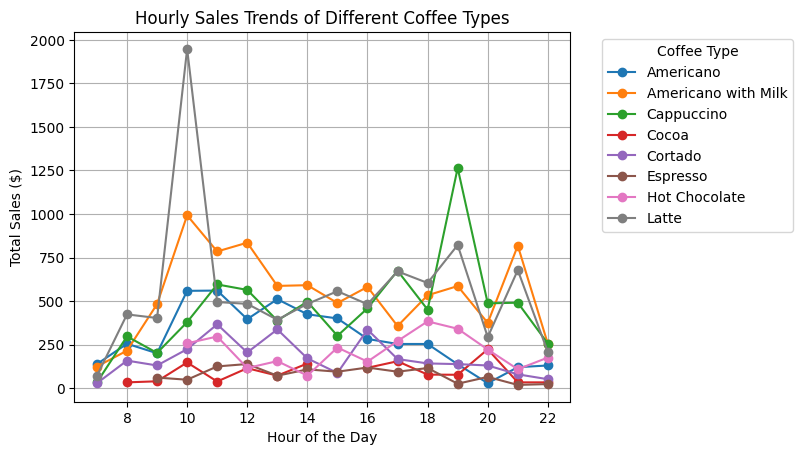

In [192]:
# Group by hour and coffee type, summing the sales amounts
coffee_trends = data.groupby([data.index.hour, 'coffee_name'])['money'].sum().unstack()

# Plotting Coffee Trends Over Time
plt.figure(figsize=(14, 8))
coffee_trends.plot(kind='line', marker='o')
plt.title('Hourly Sales Trends of Different Coffee Types')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [193]:
import plotly.express as px
# Plot
fig = px.treemap(data, path=['coffee_name'], values='money', title='Treemap of Coffee Sales')
fig.show()

In [194]:
import plotly.express as px

# Create a box plot using Plotly Express
fig = px.box(data, x='coffee_name', y='money', title='Box Plot of Coffee Prices by Type')
fig.update_xaxes(title='Coffee Type')
fig.update_yaxes(title='Price')
fig.show()

In [195]:
import plotly.express as px

# Create a violin plot using Plotly Express
fig = px.violin(data, y='money', x='coffee_name', box=True, points='all', title='Violin Plot of Coffee Prices by Type')
fig.update_xaxes(title='Coffee Type')
fig.update_yaxes(title='Price')
fig.show()

In [196]:
import plotly.express as px

# Aggregate data by hour and coffee type, summing up the sales amounts
bubble_data = data.groupby([data.index.hour, 'coffee_name'])['money'].sum().reset_index()
bubble_data.columns = ['hour', 'coffee_name', 'money']  # Ensure columns are named correctly

# Create a bubble chart
fig = px.scatter(
    bubble_data,
    x='hour',
    y='coffee_name',
    size='money',
    color='coffee_name',
    title='Bubble Chart of Sales by Hour and Coffee Type',
    labels={'hour': 'Hour of Day', 'money': 'Total Sales'}
)

# Show the plot
fig.show()


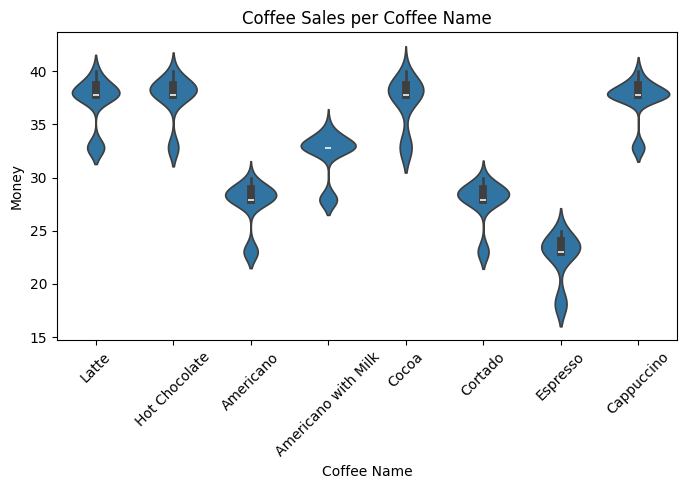

In [197]:
plt.figure(figsize=(8, 4))
sns.violinplot(x='coffee_name', y='money', data=data)
plt.title('Coffee Sales per Coffee Name')
plt.xlabel('Coffee Name')
plt.ylabel('Money')
plt.xticks(rotation=45)
plt.show()

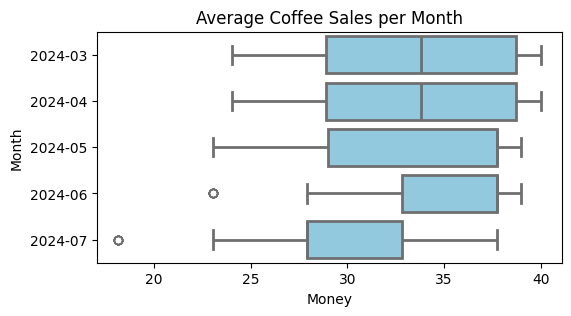

In [199]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='money', y='month', data=data, color='skyblue', linewidth=2)
plt.title('Average Coffee Sales per Month')
plt.xlabel('Money')
plt.ylabel('Month')
plt.grid(False)
plt.show()

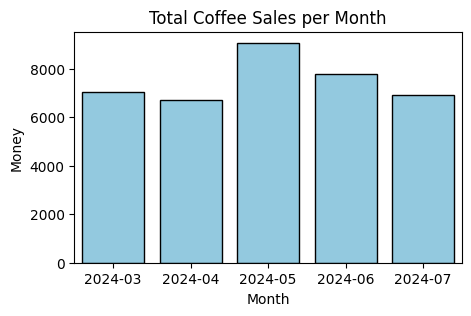

In [200]:
monthly_money_sum = data.groupby('month')['money'].aggregate('sum')
monthly_money_sum = pd.DataFrame(monthly_money_sum).reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(data=monthly_money_sum, x='month', y='money',
color='skyblue', edgecolor='black', linewidth=1);
plt.title('Total Coffee Sales per Month')
plt.xlabel('Month')
plt.ylabel('Money')
plt.show()

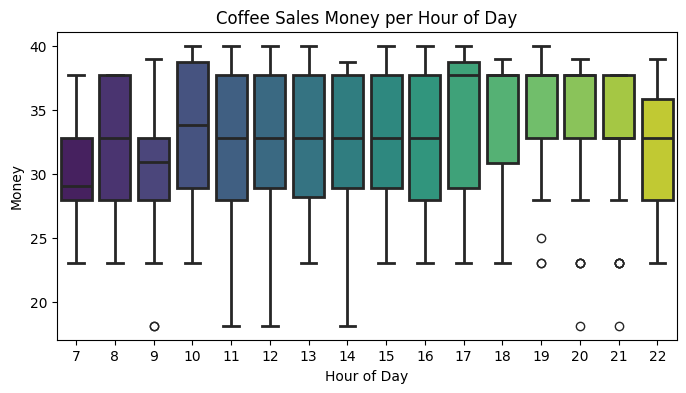

In [209]:
data['hour'] = data.index.hour
plt.figure(figsize=(8, 4))
sns.boxplot(x='hour', y='money', data=data, palette='viridis', linewidth=2)
plt.title('Coffee Sales Money per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Money')
plt.grid(False)
plt.show()

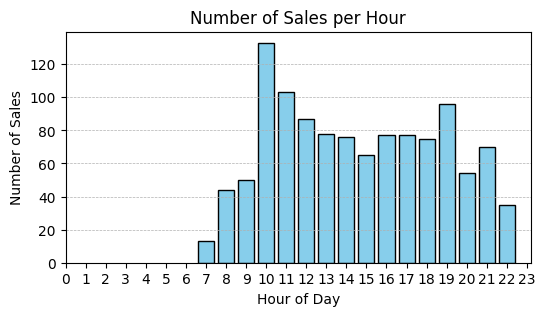

In [210]:
import matplotlib.pyplot as plt

# Aggregate data by hour to get the number of sales per hour
sales_per_hour = data.groupby('hour').size().reset_index(name='sales_count')

# Plotting
plt.figure(figsize=(6, 3))
plt.bar(sales_per_hour['hour'], sales_per_hour['sales_count'], color='skyblue', edgecolor='black', linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Hour')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [217]:
# Add day of the week and hour columns
data['day_of_week'] = data.index.day_name()

# Aggregating data by day of the week and hour
daily_hourly_summary = data.groupby(['day_of_week', 'hour']).agg({
    'money': ['count', 'sum', 'mean']
}).reset_index()

# Rename columns for clarity
daily_hourly_summary.columns = ['day_of_week', 'hour', 'transaction_count', 'total_sales', 'average_sales']

# Display the first 5 rows
print(daily_hourly_summary.head(5))

  day_of_week  hour  transaction_count  total_sales  average_sales
0      Friday     7                  2        60.74      30.370000
1      Friday     8                  4       121.48      30.370000
2      Friday     9                  9       267.26      29.695556
3      Friday    10                 18       618.14      34.341111
4      Friday    11                  9       257.16      28.573333


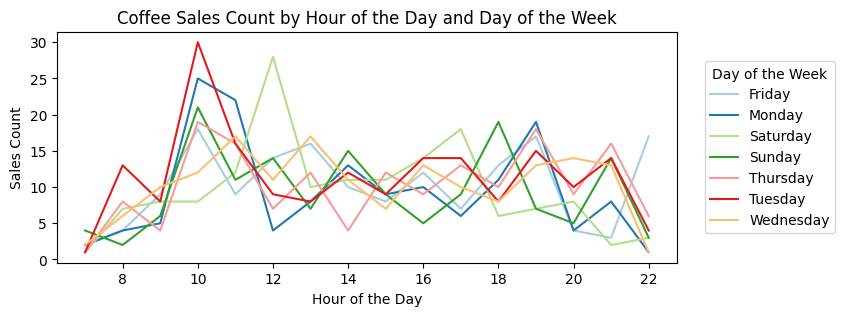

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

# Plot lineplot with correct column names
sns.lineplot(data=daily_hourly_summary, x='hour', y='transaction_count', hue='day_of_week', palette='Paired')

plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.title('Coffee Sales Count by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center')

plt.show()

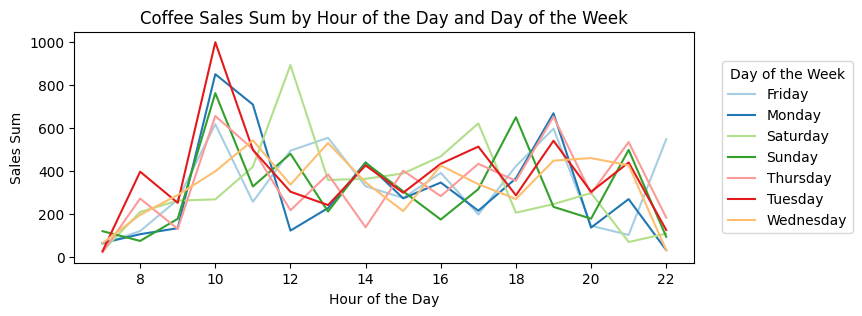

In [226]:
# Plotting
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y='total_sales', hue='day_of_week', palette='Paired')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Sum')
plt.title('Coffee Sales Sum by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center')
plt.show()

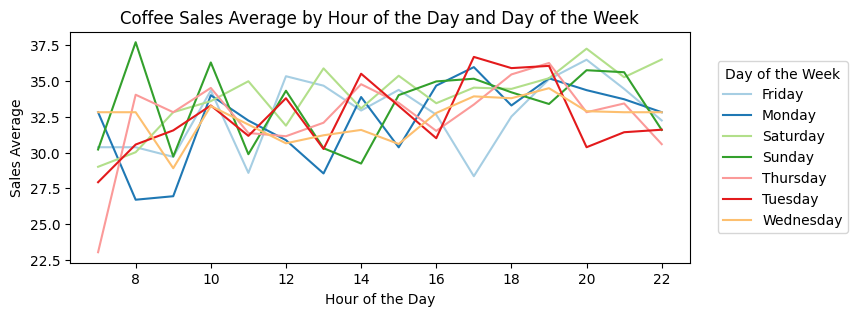

In [227]:
plt.figure(figsize=(8, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y='average_sales',
hue='day_of_week', palette='Paired')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Average')
plt.title('Coffee Sales Average by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **4. Payment Mode Preferences**

Understanding customer payment preferences is crucial for improving the checkout process and customer experience. We analyze the distribution of sales by different payment modes (e.g., cash, card).

### **Key Insights:**
- A significant preference for card payments over cash suggests a trend towards digital payments.


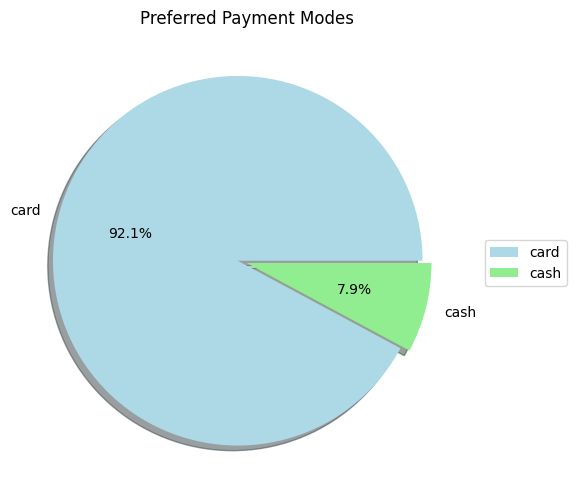

In [276]:
import matplotlib.pyplot as plt

# Payment Mode Preferences Analysis
payment_mode_sales = data['cash_type'].value_counts()

# Plot Payment Mode Preferences
plt.figure(figsize=(8, 6))
ax = payment_mode_sales.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentage on the pie slices
    colors=['lightblue', 'lightgreen'],  # Colors for pie segments
    explode=(0.05, 0),  # Slightly explode the first slice for better visibility
    shadow=True  # Add shadow for 3D effect
)

# Add legend
plt.legend(
    labels=payment_mode_sales.index,  # Labels for each segment
    loc='center left',  # Position of the legend
    bbox_to_anchor=(1, 0.5)  # Position the legend outside the pie chart
)

# Title and remove the y-label
plt.title('Preferred Payment Modes')
plt.ylabel('')

# Display the plot
plt.show()


## **5. Customer Behavior Analysis**

To further enhance sales strategies, we analyze customer behavior by segmenting customers, understanding their purchasing habits, and estimating their value to the business.

### **5.1. Customer Segmentation: One-Time vs. Returning Customers**

Customers are segmented into one-time and returning customers. This segmentation provides insights into customer loyalty and helps tailor marketing strategies.

- **One-Time Customers**: Customers who have made only one purchase.
- **Returning Customers**: Customers who have made multiple purchases.

#### **Visualizations:**

- Bar charts showing the distribution of one-time and returning customers.


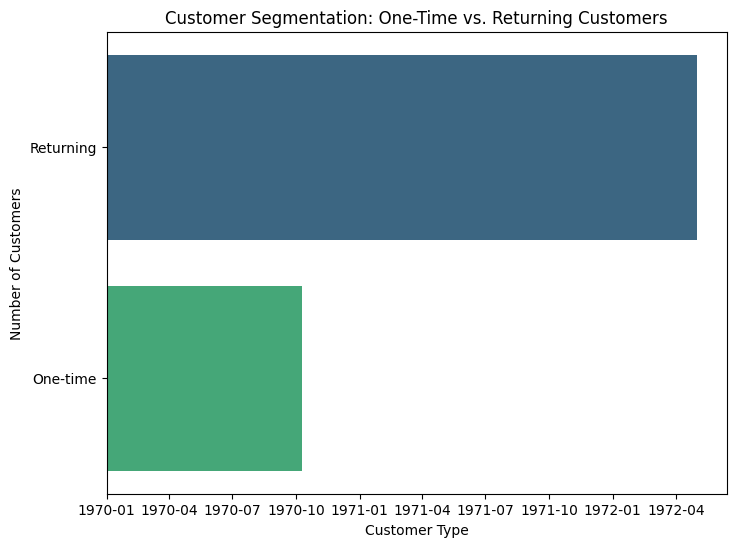

In [230]:
# Calculate the number of purchases by each customer
customer_purchases = data['card'].value_counts()

# Define returning and one-time customers
returning_customers = customer_purchases[customer_purchases > 1].index
one_time_customers = customer_purchases[customer_purchases == 1].index

# Separate sales data
data['customer_type'] = data['card'].apply(lambda x: 'Returning' if x in returning_customers else 'One-time')

# Visualize customer segmentation
plt.figure(figsize=(8, 6))
sns.countplot(data['customer_type'], palette='viridis')
plt.title('Customer Segmentation: One-Time vs. Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.show()

### **5.2. Customer Retention and Churn Analysis**

We analyze customer retention and churn rates to understand the effectiveness of the coffee shop's customer retention strategies.

- **Retention Rate**: The percentage of customers who make repeat purchases over different months.
- **Churn Rate**: The percentage of customers who do not return after their first purchase.

#### **Visualizations:**

- Histograms depicting retention rates.


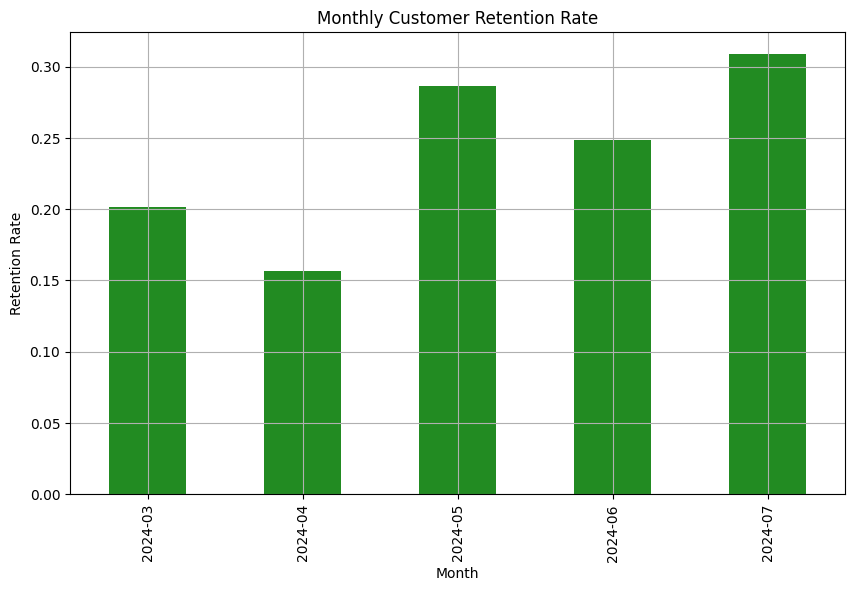

In [242]:
# Customer Retention Rate Analysis
monthly_retention = data.groupby(data.index.to_period('M'))['card'].nunique() / data['card'].nunique()

# Plot Customer Retention Rate
plt.figure(figsize=(10, 6))
monthly_retention.plot(kind='bar', color='forestgreen')
plt.title('Monthly Customer Retention Rate')
plt.xlabel('Month')
plt.ylabel('Retention Rate')
plt.grid()
plt.show()


## **6. Comparative Sales Trends Analysis**

To better understand the sales dynamics, we compare sales trends across different dimensions such as coffee types, customer segments, and payment modes.

### **Key Observations:**
- Different coffee types show distinct sales patterns, indicating unique customer preferences.
- Seasonal and temporal trends suggest opportunities for tailored promotions and inventory planning.


<Figure size 1400x800 with 0 Axes>

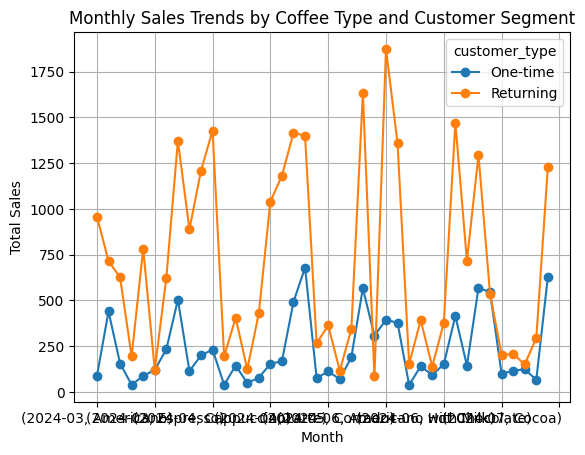

In [244]:
# Comparative Sales Trends by Coffee Type and Customer Segment
comparison_data = data.groupby([data.index.to_period('M'), 'coffee_name', 'customer_type'])['money'].sum().unstack('customer_type')

# Plot Comparative Sales Trends
plt.figure(figsize=(14, 8))
comparison_data.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends by Coffee Type and Customer Segment')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


## **7. Conclusion and Insights**

### **Summary of Findings**

- **Time-Based Sales Patterns**: The sales data reveals significant peaks during morning and evening hours, suggesting the best times for promotions and offers.

- **Popular Coffee Types**: Certain coffee types, such as Latte and Cappuccino, consistently perform well. Tailoring promotions based on the popularity of specific coffee types can drive sales further.

- **Customer Segmentation and Behavior**: Returning customers are highly valuable and generate more revenue. Implementing loyalty programs and targeted marketing could improve retention.

- **Payment Mode Preferences**: Digital payment methods are increasingly preferred by customers, indicating a shift towards cashless transactions.

### **Actionable Recommendations**

1. **Introduce Loyalty Programs**: Target high-frequency, high-value customers with loyalty programs to increase retention.

2. **Optimize Inventory Based on Popular Coffee Types**: Ensure stock availability for top-selling coffee types during peak hours and seasons.

3. **Enhance Digital Payment Options**: Encourage digital payments by providing discounts or rewards for card payments.

4. **Seasonal Promotions**: Design targeted promotions based on time-based sales trends and customer preferences.

### **Future Work**

- **Predictive Analysis for Sales Forecasting**: Use machine learning models to forecast sales for different time intervals.

- **Customer Experience Enhancement**: Further analyze customer feedback to enhance in-store and online experiences.
